# Ch-06. 자유자재로 데이터 가공하기
## 06-1. 데이터 전처리

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [58]:
os.getcwd()

'C:\\Users\\James\\Documents\\GitHub\\Doit_Python'

In [59]:
path = 'C:\\Users\\James\\Documents\\GitHub\\Doit_Python\\Data'
os.chdir(path)
os.getcwd()

'C:\\Users\\James\\Documents\\GitHub\\Doit_Python\\Data'

In [60]:
exam_raw = pd.read_csv("exam.csv")
exam = exam_raw.copy()
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [6]:
exam.shape

(20, 5)

In [7]:
exam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       20 non-null     int64
 1   nclass   20 non-null     int64
 2   math     20 non-null     int64
 3   english  20 non-null     int64
 4   science  20 non-null     int64
dtypes: int64(5)
memory usage: 928.0 bytes


In [10]:
exam.describe(include = 'all')

,id,nclass,math,english,science
count,20.00000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,3.000000,57.450000,84.900000,59.450000
std,5.91608,1.450953,20.299015,12.875517,25.292968
min,1.00000,1.000000,20.000000,56.000000,12.000000
25%,5.75000,2.000000,45.750000,78.000000,45.000000
50%,10.50000,3.000000,54.000000,86.500000,62.500000
75%,15.25000,4.000000,75.750000,98.000000,78.000000
max,20.00000,5.000000,90.000000,98.000000,98.000000


## 06-2. 조건에 맞는 데이터만 추출하기

### - (p.133) 같거나 같지 않은 조건 걸기

In [12]:
exam.query('nclass == 2')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [22]:
exam.query('nclass != 1')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65
13,14,4,48,87,12


### - (p.136) 초과, 미만, 이상, 이하 조건 걸기

In [17]:
exam.query('math >= 50')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
9,10,3,50,98,45
10,11,3,65,65,65
14,15,4,75,56,78
15,16,4,58,98,65
16,17,5,65,68,98


### - (p.138) AND

In [25]:
exam.query('nclass == 1 & math >= 50')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [26]:
exam.query('nclass == 2 & english >= 80')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45


### - (p.138) OR

In [76]:
exam.query('math >= 90 | english >= 90')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
12,13,4,46,98,65
15,16,4,58,98,65


In [27]:
exam.query('nclass == 1 | nclass == 3 | nclass == 5')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [29]:
# 상동
exam.query('nclass in [1, 3, 5]')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [8]:
# 상동
exam[exam['nclass'].isin([1, 3, 5])]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


### - (p.140) 추출한 행으로 데이터 만들기

In [41]:
nclass1 = exam.query('nclass == 1')
nclass1

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [42]:
nclass2 = exam.query('nclass == 2')
nclass2

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [43]:
nclass1['math'].mean()

46.25

In [44]:
nclass2['math'].std()

29.545163168726393

### - (p.141) 문자 변수를 이용해 조건에 맞는 행 추출하기

In [45]:
df = pd.DataFrame({'sex'     : ['F', 'M', 'F', 'M'],
                   'country' : ['Korea', 'China', 'Japan', 'USA']})
df

,sex,country
0,F,Korea
1,M,China
2,F,Japan
3,M,USA


In [46]:
df.query('sex == "F" & country == "Korea"')

,sex,country
0,F,Korea


In [47]:
df.query("sex == 'M' & country == 'China'")

,sex,country
1,M,China


### - (p.142) 외부 변수를 이용해 추출하기

#### * @var

In [51]:
var = 3
exam.query('nclass == @var')

,id,nclass,math,english,science
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


### - (p143) 데이터 프레임 출력 제한 설정하기

In [53]:
# 모든 행 출력하도록 설정
pd.set_option('display.max_rows', None)

In [55]:
# 모든 열 출력하도록 설정
pd.set_option('display.max_columns', None)

In [56]:
# 행 출력 제한 되돌리기
pd.reset_option('display.max_rows')

In [60]:
# 열 출력 제산 되돌리기
pd.reset_option('display.max_columns')

In [61]:
# 모든 설정 되돌리기
pd.reset_option('all')

### - (p.144) < 혼자서 해보기 >

#### * Q1.

In [16]:
mpg_raw = pd.read_csv('mpg.csv')
mpg = mpg_raw.copy()
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [63]:
mpg_a = mpg.query('displ <= 4')
mpg_b = mpg.query('displ >= 5')

In [64]:
mpg_a['hwy'].mean()

25.96319018404908

In [65]:
mpg_b['hwy'].mean()

18.07894736842105

#### * Q2.

In [66]:
mpg_audi = mpg.query('manufacturer == "audi"')
mpg_audi['cty'].mean()

17.61111111111111

In [67]:
mpg_toyota = mpg.query('manufacturer == "toyota"')
mpg_toyota['cty'].mean()

18.529411764705884

#### * Q3.

In [68]:
# df.query()
mpg_three = mpg.query('manufacturer in ["chevrolet", "ford", "honda"]')
mpg_three['hwy'].mean()

22.50943396226415

In [74]:
# df.isin()
mpg_three2 = mpg[mpg['manufacturer'].isin(['chevrolet', 'ford', 'honda'])]
mpg_three2['hwy'].mean()

22.50943396226415

## 06-3. 필요한 변수만 추출하기

### - (p.145) 변수 추출하기

In [75]:
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [78]:
# series 로 추출
exam['math'].head()

0    50
1    60
2    45
3    30
4    25
Name: math, dtype: int64

In [79]:
# dataframe 으로 추출
exam[['math']].head()

,math
0,50
1,60
2,45
3,30
4,25


In [80]:
exam[['nclass', 'math', 'english']].head()

,nclass,math,english
0,1,50,98
1,1,60,97
2,1,45,86
3,1,30,98
4,2,25,80


### - (p.147) 변수 제거하기

In [81]:
exam.drop(columns = 'math').head()

,id,nclass,english,science
0,1,1,98,50
1,2,1,97,60
2,3,1,86,78
3,4,1,98,58
4,5,2,80,65


In [82]:
exam.drop(columns = ['math', 'english']).head()

,id,nclass,science
0,1,1,50
1,2,1,60
2,3,1,78
3,4,1,58
4,5,2,65


### - (p.148) pandas 함수 조합하기

In [83]:
exam.query('nclass == 1')[['id', 'english']]

,id,english
0,1,98
1,2,97
2,3,86
3,4,98


In [84]:
exam.query('math >= 50')[['id', 'math']].head()

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90


### - (p.150) < 혼자서 해보기 >

#### * Q1.

In [17]:
df_mpg = mpg[['category', 'cty']]

#### * Q2.

In [18]:
cty_suv = df_mpg.query('category == "suv"')['cty'].mean()
cty_suv

13.5

In [23]:
cty_compact = df_mpg.query('category == "compact"')['cty'].mean()
cty_compact

20.127659574468087

In [27]:
result = np.where(cty_suv > cty_compact, 'cty_suv is bigger',
         np.where(cty_suv < cty_compact, 'cty_compact is bigger', 'both are the same'))
print(result)

cty_compact is bigger


## 06-4. 순서대로 정렬하기

### - (p.151) 오름차순

In [159]:
exam.sort_values('math')

,id,nclass,math,english,science
8,9,3,20,98,15
4,5,2,25,80,65
3,4,1,30,98,58
2,3,1,45,86,78
11,12,3,45,85,32
12,13,4,46,98,65
13,14,4,48,87,12
0,1,1,50,98,50
9,10,3,50,98,45
5,6,2,50,89,98


### - (p.152) 내림차순

In [160]:
exam.sort_values('math', ascending = False)

,id,nclass,math,english,science
7,8,2,90,78,25
18,19,5,89,68,87
17,18,5,80,78,90
6,7,2,80,90,45
19,20,5,78,83,58
14,15,4,75,56,78
16,17,5,65,68,98
10,11,3,65,65,65
1,2,1,60,97,60
15,16,4,58,98,65


### - (p.152) 여러 열 기준

In [162]:
exam.sort_values(['nclass', 'math'], ascending = [True, False])

,id,nclass,math,english,science
1,2,1,60,97,60
0,1,1,50,98,50
2,3,1,45,86,78
3,4,1,30,98,58
7,8,2,90,78,25
6,7,2,80,90,45
5,6,2,50,89,98
4,5,2,25,80,65
10,11,3,65,65,65
9,10,3,50,98,45


### - (p.153) < 혼자서 해보기 >

In [28]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [31]:
mpg.query('manufacturer == "audi"')['model'].value_counts()

a4 quattro    8
a4            7
a6 quattro    3
Name: model, dtype: int64

In [32]:
mpg.query('manufacturer == "audi"').sort_values('hwy', ascending = False).head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [39]:
# cf. 아우디 모델별 평균 hwy 순서대로 정렬
mpg_audi = mpg.query('manufacturer == "audi"')
mpg_audi.groupby('model').agg(mean_hwy = ('hwy', 'mean')).sort_values('mean_hwy', ascending = False)

,mean_hwy
model,
a4,28.285714
a4 quattro,25.750000
a6 quattro,24.000000


## 06-5. 파생변수 추가하기

In [40]:
exam = exam_raw.copy()
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [41]:
exam.assign(total = exam['math'] + exam['english'] + exam['science'])

,id,nclass,math,english,science,total
0,1,1,50,98,50,198
1,2,1,60,97,60,217
2,3,1,45,86,78,209
3,4,1,30,98,58,186
4,5,2,25,80,65,170
5,6,2,50,89,98,237
6,7,2,80,90,45,215
7,8,2,90,78,25,193
8,9,3,20,98,15,133
9,10,3,50,98,45,193


In [190]:
exam.assign(total = exam['math'] + exam['english'] + exam['science'],
            mean  = (exam['math'] + exam['english'] + exam['science']) / 3)

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.000000
1,2,1,60,97,60,217,72.333333
2,3,1,45,86,78,209,69.666667
3,4,1,30,98,58,186,62.000000
4,5,2,25,80,65,170,56.666667
5,6,2,50,89,98,237,79.000000
6,7,2,80,90,45,215,71.666667
7,8,2,90,78,25,193,64.333333
8,9,3,20,98,15,133,44.333333
9,10,3,50,98,45,193,64.333333


### - (p.156) df.assign() + np.where()

In [43]:
exam.assign(test = np.where(exam['science'] >= 60, 'pass', 'fail')).head()

,id,nclass,math,english,science,test
0,1,1,50,98,50,fail
1,2,1,60,97,60,pass
2,3,1,45,86,78,pass
3,4,1,30,98,58,fail
4,5,2,25,80,65,pass


In [198]:
exam.assign(total = exam['math'] + exam['english'] + exam['science']).sort_values('total').head()

,id,nclass,math,english,science,total
8,9,3,20,98,15,133
13,14,4,48,87,12,147
11,12,3,45,85,32,162
4,5,2,25,80,65,170
3,4,1,30,98,58,186


### - (p.157) lambda x:

#### : 데이터프레임명 줄여 쓰기

In [44]:
long_name = pd.read_csv('exam.csv')
long_name.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [45]:
long_name.assign(total = lambda x: x['math'] + x['english'] + x['science'])\
         .sort_values('total', ascending = False).head()

,id,nclass,math,english,science,total
17,18,5,80,78,90,248
18,19,5,89,68,87,244
5,6,2,50,89,98,237
16,17,5,65,68,98,231
15,16,4,58,98,65,221


#### * 앞에서 만든 변수를 활용해 바로 다른 변수 만들 땐 반드시 lambda x: 를 써야한다

In [ ]:
# Error
long_name.assign(total = long_name['math'] + long_name['english'] + long_name['science'],
                 mean  = long_name['total'] / 3)

In [48]:
long_name.assign(total = long_name['math'] + long_name['english'] + long_name['science'],
                 mean  = lambda x: x['total'] / 3) \
         .sort_values('mean', ascending = False).head()

,id,nclass,math,english,science,total,mean
17,18,5,80,78,90,248,82.666667
18,19,5,89,68,87,244,81.333333
5,6,2,50,89,98,237,79.000000
16,17,5,65,68,98,231,77.000000
15,16,4,58,98,65,221,73.666667


In [50]:
# 상기 코드를 가독성 좋게 lambda x: 로 통일
long_name.assign(total = lambda x: x['math'] + x['english'] + x['science'],
                 mean  = lambda x: x['total'] / 3) \
         .sort_values('mean', ascending = False).head()

,id,nclass,math,english,science,total,mean
17,18,5,80,78,90,248,82.666667
18,19,5,89,68,87,244,81.333333
5,6,2,50,89,98,237,79.000000
16,17,5,65,68,98,231,77.000000
15,16,4,58,98,65,221,73.666667


### - (p.158) < 혼자서 해보기 >

#### * Q1-Q2.

In [58]:
mpg = mpg_raw.copy()
mpg_new = mpg.assign(total = lambda x: x['cty'] + x['hwy'],
                     mean  = lambda x: x['total'] / 2)
mpg_new.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mean
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,51,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,42,21.0


#### * Q3.

In [59]:
mpg_new.sort_values('mean', ascending = False).head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mean
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,79,39.5
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,77,38.5
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,70,35.0


#### * Q4.

In [61]:
mpg.assign(total = lambda x: x['cty'] + x['hwy'],
           mean  = lambda x: x['total'] / 2) \
   .sort_values('mean', ascending = False) \
   .head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mean
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,79,39.5
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,77,38.5
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,70,35.0


## 06-6. 집단별로 요약하기

In [62]:
exam['math'].mean()

57.45

In [63]:
exam.agg(mean_math = ('math', 'mean'))

,math
mean_math,57.45


### - (p.160) 집단별 요약 통계량 구하기

In [66]:
exam.groupby('nclass').agg(mean_math = ('math', 'mean'))

,mean_math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


### - (p.161) 변수를 인덱스로 바꾸지 않기 (as_index = False)

In [64]:
exam.groupby('nclass', as_index = False).agg(mean_math = ('math', 'mean'))

,nclass,mean_math
0,1,46.25
1,2,61.25
2,3,45.00
3,4,56.75
4,5,78.00


### - (p.161) 여러 요약 통계량 한 번에 구하기

In [225]:
exam.groupby('nclass', as_index = False) \
    .agg(mean_math   = ('math', 'mean'),
         sum_math    = ('math', 'sum'),
         median_math = ('math', 'median'),
         n           = ('math', 'count'))

,nclass,mean_math,sum_math,median_math,n
0,1,46.25,185,47.5,4
1,2,61.25,245,65.0,4
2,3,45.00,180,47.5,4
3,4,56.75,227,53.0,4
4,5,78.00,312,79.0,4


### - (p.162) 모든 변수의 요약 통계량 한 번에 구하기

In [67]:
exam.groupby('nclass', as_index = False).mean()

,nclass,id,math,english,science
0,1,2.5,46.25,94.75,61.50
1,2,6.5,61.25,84.25,58.25
2,3,10.5,45.00,86.50,39.25
3,4,14.5,56.75,84.75,55.00
4,5,18.5,78.00,74.25,83.25


In [68]:
exam.groupby('nclass', as_index = False).median()

,nclass,id,math,english,science
0,1,2.5,47.5,97.5,59.0
1,2,6.5,65.0,84.5,55.0
2,3,10.5,47.5,91.5,38.5
3,4,14.5,53.0,92.5,65.0
4,5,18.5,79.0,73.0,88.5


### - (p.163) 집단별로 다시 집단 나누기

In [69]:
mpg.groupby(['manufacturer', 'drv']).agg(mean_cty = ('cty', 'mean'))

mean_cty
manufacturer drv           
audi         4    16.818182
             f    18.857143
chevrolet    4    12.500000
             f    18.800000
             r    14.100000
dodge        4    12.000000
             f    15.818182
ford         4    13.307692
             r    14.750000
honda        f    24.444444
hyundai      f    18.642857
jeep         4    13.500000
land rover   4    11.500000
lincoln      r    11.333333
mercury      4    13.250000
nissan       4    13.750000
             f    20.000000
pontiac      f    17.000000
subaru       4    19.285714
toyota       4    14.933333
             f    21.368421
volkswagen   f    20.925926

In [70]:
mpg.groupby(['manufacturer', 'drv'], as_index = False).agg(mean_cty = ('cty', 'mean'))

,manufacturer,drv,mean_cty
0,audi,4,16.818182
1,audi,f,18.857143
2,chevrolet,4,12.500000
3,chevrolet,f,18.800000
4,chevrolet,r,14.100000
5,dodge,4,12.000000
6,dodge,f,15.818182
7,ford,4,13.307692
8,ford,r,14.750000
9,honda,f,24.444444


In [71]:
mpg.query('manufacturer == "audi"') \
   .groupby('drv', as_index = False).agg(n = ('drv', 'count'))

,drv,n
0,4,11
1,f,7


In [72]:
mpg.query('manufacturer == "chevrolet"') \
   .groupby('drv').agg(n = ('drv', 'count'))

,n
drv,
4,4
f,5
r,10


### - (p.164) value_counts()로 집단별 빈도 간단히 구하기

In [73]:
mpg.groupby('drv').agg(n = ('drv', 'count'))

,n
drv,
4,103
f,106
r,25


In [83]:
mpg['drv'].value_counts().sort_index()

4    103
f    106
r     25
Name: drv, dtype: int64

### - (p.165) value_counts() 에 query() 적용하기 (Series -> DataFrame)

In [77]:
# df.groupby().agg().query() 가능
mpg.groupby('drv').agg(n = ('drv', 'count')).query('n > 100')

,n
drv,
4,103
f,106


In [79]:
# value_counts() 함수를 사용하면 더 짧은 코드로 같은 결과를 얻을 수 있지만,
# series 자료구조이므로 query() 함수를 이용할 수 없는 단점이 있음
# Error
mpg['drv'].value_counts().query('n > 100')

AttributeError: 'Series' object has no attribute 'query'

In [84]:
# 따라서 value_counts() 함수를 사용하면서 query() 함수를 사용할 경우, 
# series 자료구조를 DataFrame으로 바꿔야 함
mpg['drv'].value_counts() \
          .to_frame('n') \
          .rename_axis('drv') \
          .query('n > 100').sort_index()

,n
drv,
4,103
f,106


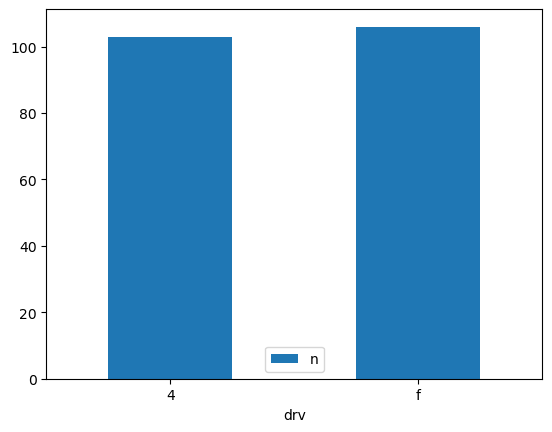

In [88]:
mpg['drv'].value_counts().to_frame('n').rename_axis('drv').query('n > 100').sort_index() \
          .plot.bar(rot = 0);

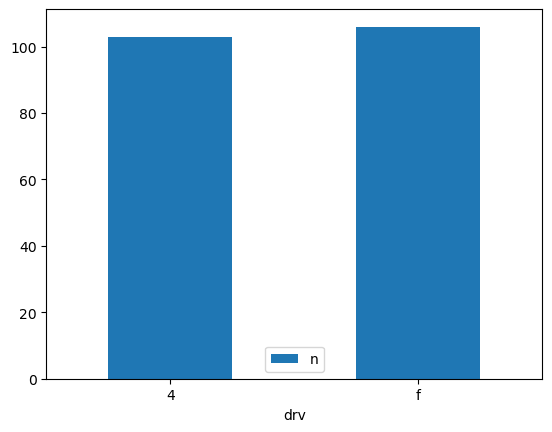

In [89]:
mpg.groupby('drv').agg(n = ('drv', 'count')).query('n > 100') \
   .plot.bar(rot = 0);

### - (p.165) Q. 제조회사별 'suv'의 도시 및 고속도록 합산 연비 평균 -> 내림차순 상위 5위

In [100]:
mpg.query('category == "suv"') \
   .assign(total = lambda x: x['cty'] + x['hwy'],
           mean_total  = lambda x: x['total'] / 2) \
   .groupby('manufacturer') \
   .agg(mean_suv = ('mean_total', 'mean')) \
   .sort_values('mean_suv', ascending = False) \
   .head()

,mean_suv
manufacturer,
subaru,21.916667
toyota,16.312500
nissan,15.875000
mercury,15.625000
jeep,15.562500


In [262]:
mpg.query('category == "suv"') \
   .assign(total = lambda x: (x['cty'] + x['hwy']) / 2) \
   .groupby('manufacturer') \
   .agg(mean_tot = ('total', 'mean')) \
   .sort_values('mean_tot', ascending = False) \
   .head()

,mean_tot
manufacturer,
subaru,21.916667
toyota,16.312500
nissan,15.875000
mercury,15.625000
jeep,15.562500


### - (p.166) < 혼자서 해보기 >

#### * Q1.

In [101]:
mpg.groupby('category').agg(mean_cty = ('cty', 'mean'))

,mean_cty
category,
2seater,15.400000
compact,20.127660
midsize,18.756098
minivan,15.818182
pickup,13.000000
subcompact,20.371429
suv,13.500000


#### * Q2.

In [103]:
mpg.groupby('category').agg(mean_cty = ('cty', 'mean')) \
   .sort_values('mean_cty', ascending = False)

,mean_cty
category,
subcompact,20.371429
compact,20.127660
midsize,18.756098
minivan,15.818182
2seater,15.400000
suv,13.500000
pickup,13.000000


#### * Q3.

In [114]:
mpg.groupby('manufacturer').agg(mean_hwy = ('hwy', 'mean')) \
   .sort_values('mean_hwy', ascending = False).head(3)

,mean_hwy
manufacturer,
honda,32.555556
volkswagen,29.222222
hyundai,26.857143


#### * Q4.

In [117]:
mpg.query('category == "compact"') \
   .groupby('manufacturer') \
   .agg(n_compact = ('manufacturer', 'count')) \
   .sort_values('n_compact', ascending = False)

,n_compact
manufacturer,
audi,15
volkswagen,14
toyota,12
subaru,4
nissan,2


In [120]:
# or series 자료구조로
mpg.query('category == "compact"').value_counts('manufacturer')

manufacturer
audi          15
volkswagen    14
toyota        12
subaru         4
nissan         2
dtype: int64

In [127]:
# 상기 series 를 dataframe 자료구조로
mpg.query('category == "compact"') \
   .value_counts('manufacturer') \
   .to_frame('n_compact') \
   .rename_axis('manufacturer')

,n_compact
manufacturer,
audi,15
volkswagen,14
toyota,12
subaru,4
nissan,2


## 06-7. 데이터 합치기

### - (p.168) 가로로 합치기

In [46]:
test_mid = pd.DataFrame({'id'      : [1, 2, 3, 4, 5],
                         'midterm' : [60, 80, 70, 90, 85]})
test_final = pd.DataFrame({'id'    : [1, 2, 3, 4, 5],
                           'final' : [70, 83, 65, 95, 80]})

#### (1) 데이터 칼럼명이 같을 때 : merge(df1, df2, how, on)

In [47]:
test_total = pd.merge(test_mid, test_final, how = 'left', on = 'id')
test_total

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


In [48]:
# or
test_mid.merge(test_final, how = 'left', on = 'id')

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


#### (2) 데이터 칼럼명이 다를 때 : merge(df1, df2, left_on, right_on)

In [50]:
test_final.columns = ['no', 'final']
pd.merge(test_mid, test_final, left_on = 'id', right_on = 'no')

,id,midterm,no,final
0,1,60,1,70
1,2,80,2,83
2,3,70,3,65
3,4,90,4,95
4,5,85,5,80


In [51]:
# or
test_mid.merge(test_final, left_on = 'id', right_on = 'no')

,id,midterm,no,final
0,1,60,1,70
1,2,80,2,83
2,3,70,3,65
3,4,90,4,95
4,5,85,5,80


In [54]:
name = pd.DataFrame({'nclass' : [1, 2, 3, 4, 5],
                     'teacher' : ['kim', 'lee', 'park', 'choi', 'jung']})

In [ ]:
exam_new = pd.merge(exam, name, how = 'left', on = 'nclass')
exam_new.head()

### - (p.170) 세로로 합치기

In [56]:
group_a = pd.DataFrame({'id' : [1, 2, 3, 4, 5],
                        'test' : [60, 80, 70, 90, 85]})
group_b = pd.DataFrame({'id' : [6, 7, 8, 9, 10],
                        'test' : [70, 83, 65, 95, 80]})

#### (1) 기존 인덱스 그대로 사용 : concat([df1, df2])

In [143]:
group_all = pd.concat([group_a, group_b])
group_all

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80


#### (2) 신규 인덱스 부여(ignore_index = True)

In [144]:
group_all = pd.concat([group_a, group_b], ignore_index = True)
group_all

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
5,6,70
6,7,83
7,8,65
8,9,95
9,10,80


### - (p.172) < 혼자서 해보기 >

In [61]:
mpg_raw = pd.read_csv('mpg.csv')
mpg = mpg_raw.copy()
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [62]:
fuel = pd.DataFrame({'fl'       : ['c', 'd', 'e', 'p', 'r'],
                     'price_fl' : [2.35, 2.38, 2.11, 2.76, 2.22]})
fuel

,fl,price_fl
0,c,2.35
1,d,2.38
2,e,2.11
3,p,2.76
4,r,2.22


#### * Q1.

In [68]:
# way1
mpg_fl = pd.merge(mpg, fuel, how = 'left', on = 'fl')
mpg_fl.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,price_fl
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,2.76
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,2.76
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,2.76
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,2.76
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,2.76


In [69]:
# way2
mpg_fl = mpg.merge(fuel, how = 'left', on = 'fl')
mpg_fl.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,price_fl
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,2.76
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,2.76
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,2.76
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,2.76
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,2.76


In [71]:
# way3
mpg_fl = mpg.merge(fuel, left_on = 'fl', right_on = 'fl')
mpg_fl.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,price_fl
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,2.76
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,2.76
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,2.76
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,2.76
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,2.76


#### * Q2.

In [72]:
mpg_fl[['model', 'fl', 'price_fl']].head()

,model,fl,price_fl
0,a4,p,2.76
1,a4,p,2.76
2,a4,p,2.76
3,a4,p,2.76
4,a4,p,2.76


### - (p.176) < 분석 도전 >

#### * Q1.

In [104]:
midwest_raw = pd.read_csv('midwest.csv')

In [105]:
midwest = midwest_raw.copy()
midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR


In [101]:
# way 1
midwest_kids = midwest.assign(popkids = lambda x: x['poptotal'] - x['popadults'],
                              ratiokids = lambda x: round(x['popkids'] / x['poptotal'] * 100, 3))
midwest_kids[['PID', 'county', 'state', 'poptotal', 'popadults', 'popkids', 'ratiokids']]

,PID,county,state,poptotal,popadults,popkids,ratiokids
0,561,ADAMS,IL,66090,43298,22792,34.486
1,562,ALEXANDER,IL,10626,6724,3902,36.721
2,563,BOND,IL,14991,9669,5322,35.501
3,564,BOONE,IL,30806,19272,11534,37.441
4,565,BROWN,IL,5836,3979,1857,31.820
...,...,...,...,...,...,...,...
432,3048,WAUKESHA,WI,304715,195837,108878,35.731
433,3049,WAUPACA,WI,46104,30109,15995,34.693
434,3050,WAUSHARA,WI,19385,13316,6069,31.308
435,3051,WINNEBAGO,WI,140320,88960,51360,36.602


In [109]:
# way 2
midwest['ratiokids'] = (midwest['poptotal'] - midwest['popadults']) / midwest['poptotal'] * 100

In [111]:
midwest[['PID', 'county', 'state', 'poptotal', 'popadults', 'ratiokids']]

,PID,county,state,poptotal,popadults,ratiokids
0,561,ADAMS,IL,66090,43298,34.486307
1,562,ALEXANDER,IL,10626,6724,36.721250
2,563,BOND,IL,14991,9669,35.501301
3,564,BOONE,IL,30806,19272,37.440758
4,565,BROWN,IL,5836,3979,31.819740
...,...,...,...,...,...,...
432,3048,WAUKESHA,WI,304715,195837,35.731093
433,3049,WAUPACA,WI,46104,30109,34.693302
434,3050,WAUSHARA,WI,19385,13316,31.307712
435,3051,WINNEBAGO,WI,140320,88960,36.602052


#### * Q2.

In [95]:
midwest_kids.sort_values('ratiokids', ascending = False) \
            .head() \
            [['PID', 'county', 'state', 'poptotal', 'popadults', 'popkids', 'ratiokids']]

,PID,county,state,poptotal,popadults,popkids,ratiokids
230,1233,ISABELLA,MI,54624,26492,28132,51.501
404,3020,MENOMINEE,WI,3890,1922,1968,50.591
281,2013,ATHENS,OH,59549,30179,29370,49.321
247,1250,MECOSTA,MI,37308,19005,18303,49.059
154,715,MONROE,IN,108978,57368,51610,47.358


#### * Q3.

In [113]:
midwest_kids = midwest_kids.assign(gradekids = np.where(midwest_kids['ratiokids'] >= 40, 'large',
                                               np.where(midwest_kids['ratiokids'] >= 30, 'middle', 'small')))
midwest_kids.value_counts('gradekids') \
            .sort_index() \
            .to_frame('n') \
            .rename_axis('gradekids')

,n
gradekids,
large,32
middle,396
small,9


In [114]:
# way 2
midwest_kids.groupby('gradekids').agg(n = ('gradekids', 'count'))

,n
gradekids,
large,32
middle,396
small,9


#### * Q4.

In [100]:
midwest.assign(ratioasian = midwest['popasian'] / midwest['poptotal'] * 100) \
       .sort_values('ratioasian', ascending = True) \
       .head(10) \
       [['state', 'county', 'poptotal', 'popasian', 'ratioasian']]

,state,county,poptotal,popasian,ratioasian
404,WI,MENOMINEE,3890,0,0.000000
105,IN,BENTON,9441,1,0.010592
109,IN,CARROLL,18809,3,0.015950
358,OH,VINTON,11098,3,0.027032
390,WI,IRON,6153,2,0.032504
85,IL,SCOTT,5644,3,0.053154
112,IN,CLAY,24705,15,0.060716
261,MI,OSCODA,7842,5,0.063759
340,OH,PERRY,31557,21,0.066546
73,IL,PIATT,15548,11,0.070749


## End.